# Decision Tree Classifier

**Overview**

The Decision Tree Clasifier model is a binary classifier that is often used for predicting categorical outcomes. In this particular case, the model is being used to predict whether an individual's income is above or below a certain threshold based on a dataset containing information about various demographic and economic factors. 

> The dataset can be found [here](https://github.com/nagensk9/INDE577_ML/blob/main/Dataset/Classification/adult.csv). An official version of the dataset can also be found on Kaggle [here](https://www.kaggle.com/datasets/wenruliu/adult-income-dataset).

- The dataset consists of **48,789 observations and 15 variables**, all of which are numerical in nature. The variables in the dataset include information such as **age, workclass, education, marital status, occupation, and hours worked per week**, among others. These variables are used as input to the perceptron model, which then makes predictions about an individual's income based on these inputs.

- The model's performance is evaluated using several evaluation metrics, including accuracy, precision, recall, and F1 score. The confusion matrix is also used to evaluate the model's performance and identify any areas where it may be making errors.

In [ ]:
# Import the required libraries for data processing and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import the required libraries for machine learning
import math
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import learning_curve

#### Data

In [ ]:
# Set the dataset URL
url = "https://raw.githubusercontent.com/nagensk9/INDE577_ML/main/Dataset/Classification/adult.csv"

In [ ]:

def load_data(url):
    """
    Load data from given url.
    """
    df = pd.read_csv(url)
    return df

###Data Cleaning

In [ ]:
def clean_data(df):
    """
    Clean the data by replacing missing values and transforming columns.
    """
    # Replace '?' with the mode in workclass, occupation, and native-country columns
    df['workclass'].replace('?', df['workclass'].mode()[0], inplace=True)
    df['occupation'].replace('?', df['occupation'].mode()[0], inplace=True)
    df['native-country'].replace('?', df['native-country'].mode()[0], inplace=True)
    # Convert income column to 0/1
    df['income'] = df['income'].apply(lambda x: 0 if x == '<=50K' else 1)

    # Drop duplicate rows
    df.drop_duplicates(inplace=True)

    # Map education categories to broader categories
    edu_mapping = {
        '1st-4th': 'HS',
        '5th-6th': 'HS',
        '7th-8th': 'HS',
        '9th': 'HS',
        '10th': 'HS',
        '11th': 'HS',
        '12th': 'HS',
        'HS-grad': 'Grad',
        'Assoc-acdm': 'college',
        'Assoc-voc': 'college',
        'Some-college': 'college',
        'Bachelors': 'Bachelors',
        'Masters': 'Masters',
        'Prof-school': 'Masters',
        'Doctorate': 'Doctorate',
    }

    df['education'] = df['education'].map(edu_mapping)

    # Map marital status categories to broader categories
    marital_mapping = {
        'Never-married': 'Never_married',
        'Married-civ-spouse': 'Married',
        'Married-spouse-absent': 'Married',
        'Married-AF-spouse': 'Married',
        'Widowed': 'Widowed',
        'Divorced': 'Separated',
        'Separated': 'Separated',
    }

    df['marital-status'] = df['marital-status'].map(marital_mapping)

    # Create a LabelEncoder object
    le = LabelEncoder()

    # Apply label encoding to every column in the DataFrame
    df = df.apply(lambda col: le.fit_transform(col.astype(str)), axis=0)

    return df


In [ ]:
def split_data(df):
    """
    Prepare the data by selecting features and splitting into training and testing sets.
    """
    # list of columns to drop
    cols_to_drop = ['education', 'native-country', 'income']
    # set y as the "predclass" column
    y = df['income']

    # set X as the dataset with the columns to drop removed
    X = df.drop(cols_to_drop, axis=1)

    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    return X_train, X_test, y_train, y_test


#### Build Model

In [ ]:
def train_model(X_train, y_train):
    """
    Train the logistic regression model on the training data.
    """
    # Instantiate the  model
    model = DecisionTreeClassifier()
    # Fit the model on the training data
    model.fit(X_train, y_train)

    return model

In [ ]:
def evaluate_model(logreg, X_test, y_test):
    # Predict on the test data
    y_pred = logreg.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("Confusion Matrix:\n", conf_matrix)
    return y_pred

#### Model Performance Plots

In [ ]:
def plot_confusion_matrix(y_true, y_pred):
    """
    Plots a confusion matrix given true and predicted labels.
    
    Args:
        y_true (numpy.ndarray): Array of true labels.
        y_pred (numpy.ndarray): Array of predicted labels.
    """
    cm = confusion_matrix(y_true, y_pred)
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax, cmap='Blues', fmt='g', cbar=False)
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(['Negative', 'Positive'])
    ax.yaxis.set_ticklabels(['Negative', 'Positive'])

In [ ]:
def plot_roc_curve(model, X_test, y_test):
    # Predict probabilities for test set
    y_score = model.predict_proba(X_test)[:, 1]

    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

#### Implementation

In [ ]:
# Load the dataset
df = load_data(url)


In [ ]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [ ]:
# Clean the data
df = clean_data(df)

In [ ]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = split_data(df)

In [ ]:
# Train the linear regression model
model = train_model(X_train, y_train)

In [ ]:
# Evaluate the model on the test set
y_pred = evaluate_model(model, X_test, y_test)

Accuracy: 0.8075425292068047
Precision: 0.6082431307243963
Recall: 0.609257714762302
F1 Score: 0.60875
Confusion Matrix:
 [[6419  941]
 [ 937 1461]]


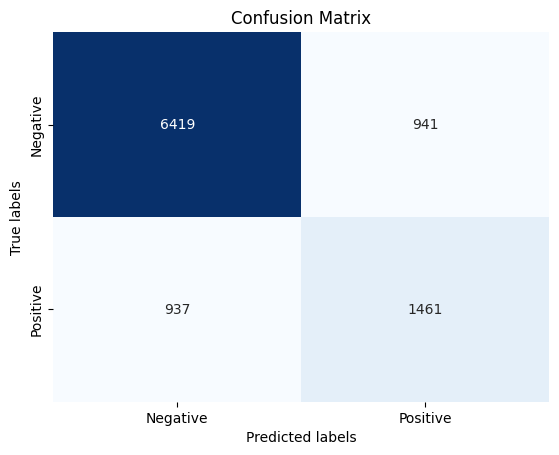

In [ ]:
# Plot Confusion Matrix
plot_confusion_matrix(y_test, y_pred)

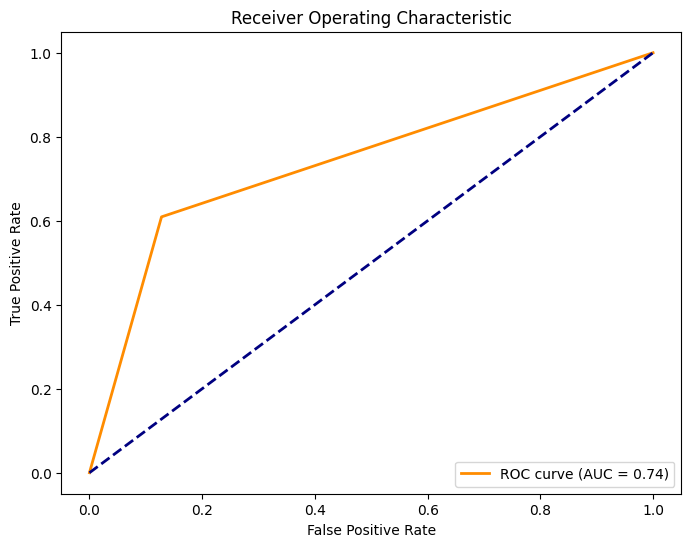

In [ ]:
# ROC Plot
plot_roc_curve(model, X_test, y_test)

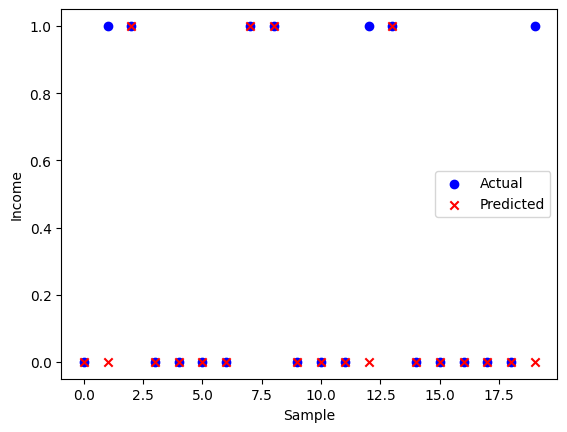

In [ ]:
# create a scatter plot of actual vs predicted values for the first 20 samples
plt.scatter(range(20), y_test[:20], color='blue', label='Actual')
plt.scatter(range(20), y_pred[:20], color='red', marker='x', label='Predicted')

# set axis labels and legend
plt.xlabel('Sample')
plt.ylabel('Income')
plt.legend()

# show the plot
plt.show()


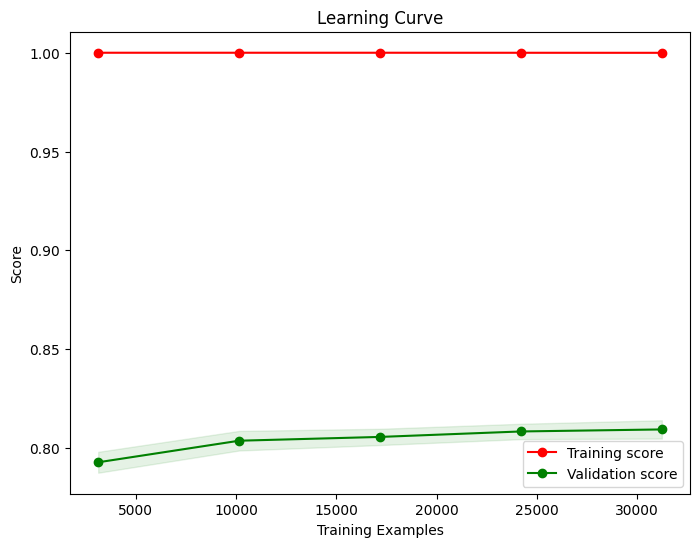

In [ ]:
# Calculate learning curve scores
train_sizes, train_scores, test_scores = learning_curve(estimator=model, X=X_train, y=y_train, cv=5, scoring='accuracy', n_jobs=-1)

# Calculate mean and standard deviation of training and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(8, 6))
plt.title("Learning Curve")
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Validation score")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.legend(loc="best")
plt.show()